In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
datos=pd.read_excel("datosholograma-def.xls",header=None)

In [70]:
datos.head()

,0,1,2,3,4,5,6
0,84.37,84.946893,88.405446,NaN,115,82.0,68.0
1,145.394,145.798519,142.412920,NaN,194,150.0,130.0
2,84.4533,114.031199,118.326636,NaN,98,122.0,157.0
3,69.2098,108.242550,106.630445,NaN,87,108.0,67.0
4,123.402,130.022399,130.129105,NaN,133,128.0,177.0


In [71]:
entrada=datos.values[:-1,0:3]
salida=datos.values[:-1,4:]


Optimization Finished!
Accuracy: 0.875
cost:  0.0


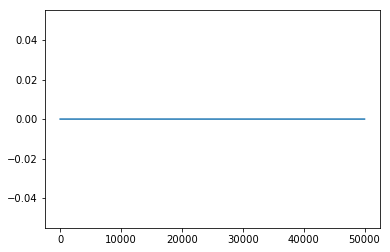

In [77]:
X_train=entrada
Y_train=salida

total_len = X_train.shape[0]
# Parameters
learning_rate = 0.001
training_epochs = 50000
batch_size = 10
display_step = 1
dropout_rate = 0.9
# Network Parameters
n_hidden_1 = 32 # 1st layer number of features
n_hidden_2 = 200 # 2nd layer number of features
n_hidden_3 = 200
n_hidden_4 = 256
n_input = X_train.shape[1]
n_classes = 3

# tf Graph input
x = tf.placeholder("float", [None, 3])
y = tf.placeholder("float", [None,3])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)

    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)

    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], 0, 0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], 0, 0.1)),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], 0, 0.1)),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4], 0, 0.1)),
    'out': tf.Variable(tf.random_normal([n_hidden_4, n_classes], 0, 0.1))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1], 0, 0.1)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2], 0, 0.1)),
    'b3': tf.Variable(tf.random_normal([n_hidden_3], 0, 0.1)),
    'b4': tf.Variable(tf.random_normal([n_hidden_4], 0, 0.1)),
    'out': tf.Variable(tf.random_normal([n_classes], 0, 0.1))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.square(pred-y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

history_cost=[]
history_acur=[]
# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(total_len/batch_size)
        _,c, p = sess.run([optimizer, cost, pred], feed_dict={x: X_train, y: Y_train})
        # Loop over all batches
#         for i in range(total_batch-1):
#             batch_x = X_train[i*batch_size:(i+1)*batch_size]
#             batch_y = Y_train[i*batch_size:(i+1)*batch_size]
#             # Run optimization op (backprop) and cost op (to get loss value)
#             _, c, p = sess.run([optimizer, cost, pred], feed_dict={x: batch_x,
#                                                           y: batch_y})
#             # Compute average loss
#             avg_cost += c / total_batch

        # sample prediction
#         label_value = batch_y
        label_value=Y_train
        estimate = p
        err = label_value-estimate
#         print ("num batch:", total_batch)

        # Display logs per epoch step
        if epoch % display_step == 0:
#             print ("Epoch:", '%04d' % (epoch+1), "cost=", \
#                 "{:.9f}".format(avg_cost))
            history_cost.append(avg_cost)
#             print ("[*]----------------------------")
#             for i in range(3):
#                 print ("label value:", label_value[i], \
#                     "estimated value:", estimate[i])
#             print ("[*]============================")

    print ("Optimization Finished!") 

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    history_acur.append(accuracy)
       
    print ("Accuracy:", accuracy.eval({x: X_train, y: Y_train}))
    print("cost: ", avg_cost)
    saver = tf.train.Saver() 
    save_path = saver.save(sess, "checkpoints/diego") 
plt.plot(history_cost)
# plt.axis([0, training_epochs, 0, 20])


# f, axarr = plt.subplots(2, sharex=True)
# axarr[0].plot(history_cost)
# axarr[0].set_title('Matrices')
# axarr[1].plot(history_acur)

In [78]:

tf.reset_default_graph()

In [79]:

sess=tf.InteractiveSession()
saver= tf.train.import_meta_graph('checkpoints/diego.meta')
saver.restore(sess, "checkpoints/diego")

INFO:tensorflow:Restoring parameters from checkpoints/diego


In [80]:
x = tf.placeholder("float", [None, 3])

x1=entrada
print(sess.run(tf.cast(p,tf.float32),feed_dict={x:x1}))

[[ 114.71552277   81.79224396   67.911026  ]
 [ 193.98632812  150.16223145  130.07086182]
 [  97.85005188  121.43009949  157.42926025]
 [  86.92189026  107.07813263   66.71955872]
 [ 132.98495483  128.22581482  177.07377625]
 [ 102.89069366  188.99815369  169.9942627 ]
 [ 213.94213867  126.07823944   44.0398941 ]
 [  79.82534027   90.9853363   165.18855286]
 [ 192.948349     90.02725983   99.02600098]
 [  93.99304962   59.96570587  108.02996826]
 [ 157.1491394   188.43380737   64.22414398]
 [ 223.99064636  162.94851685   46.03160477]
 [  55.99329376   60.99301529  149.94921875]
 [  69.99786377  148.00538635   72.97123718]
 [ 174.91992188   54.01860046   59.93754959]
 [ 231.04705811  198.94706726   31.05512047]
 [ 186.94573975   85.945961    148.99066162]
 [   8.13056564  133.02371216  160.86630249]
 [ 242.98426819  242.95219421  242.45724487]
 [ 195.93029785  195.12278748  191.85296631]
 [ 164.53971863  165.93167114  168.93841553]
 [ 121.99053192  121.90431976  120.71141815]
 [  85.024

In [81]:
salida

array([[115, 82.0, 68.0],
       [194, 150.0, 130.0],
       [98, 122.0, 157.0],
       [87, 108.0, 67.0],
       [133, 128.0, 177.0],
       [103, 189.0, 170.0],
       [214, 126.0, 44.0],
       [80, 91.0, 166.0],
       [193, 90.0, 99.0],
       [94, 60.0, 108.0],
       [157, 188.0, 64.0],
       [224, 163.0, 46.0],
       [56, 61.0, 150.0],
       [70, 148.0, 73.0],
       [175, 54.0, 60.0],
       [231, 199.0, 31.0],
       [187, 86.0, 149.0],
       [8, 133.0, 161.0],
       [243, 243.0, 242.0],
       [200, 200.0, 200.0],
       [160, 160.0, 160.0],
       [122, 122.0, 121.0],
       [85, 85.0, 85.0],
       [52, 52.0, 52.0]], dtype=object)